# This notebook features Collaborative filtering using matrix factorization*

## Loading in data

In [1]:
import pandas as pd
import numpy as np

In [2]:
user_item = pd.DataFrame(
    pd.read_csv('/home/grimoire/Projects/BeerRatings/user_item_matrix.csv'))

# Looking at the shape of our data (The user-item matrix)

In [3]:
user_item.shape

(3156, 13831)

## Transposing our matrix to item-user

In [4]:
X = user_item.values.T

In [5]:
# Verifying the transposition
X.shape

(13831, 3156)

## Working with Single Value Decomposition
* Visualizing explained error with n dimensions

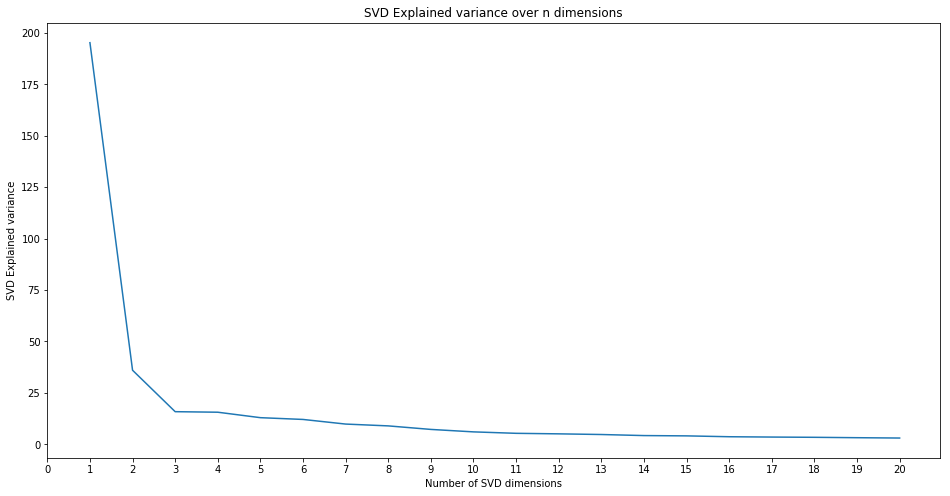

In [6]:
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.decomposition import TruncatedSVD

# Initialize a new PCA model with a default number of components.
svd = TruncatedSVD(n_components=20)
svd.fit(X)

plt.figure(figsize=[16,8])
plt.plot(range(1,len(svd.explained_variance_)+1), svd.explained_variance_)
plt.xticks(range(0,len(svd.explained_variance_)+1,1))

plt.title('SVD Explained variance over n dimensions')
plt.ylabel('SVD Explained variance')
plt.xlabel('Number of SVD dimensions')
plt.show()

## Parameter for n_components should be based upon model testing and evauluation

In [7]:
svd = TruncatedSVD(n_components=12, random_state=3)
matrix = svd.fit_transform(X)
matrix.shape

(13831, 3)

## Building our pearson coeffienct matrix using the transformed data matrix

In [8]:
import warnings
warnings.filterwarnings("ignore", category = RuntimeWarning)
corr = np.corrcoef(matrix)
corr.shape

(13831, 13831)

In [9]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(matrix, matrix)

In [10]:
#############################################################
# The coeffecient matrix is an 2D array of arrays
# There is no indication of what columns refer to what beer
# We will pull this information from our user_item matrix
# Create a list of the beers from the columns
# The index of the list will correspond with the coefficient matrix
#############################################################

beer_names = user_item.columns
beer_name_list = list(beer_names)
len(beer_names)

13831

In [11]:
def recommendations(beer, beer_names=beer_names) :
    
    # https://stackoverflow.com/questions/944592/best-practice-for-python-assert
    # Self note: build an exception class for beer parameter
    
    assert beer in beer_names, 'The beer isn\'t currently in the recommendation list,\
 rate it more and it will be soon!' # This derives from user input not matching beer_names, add to exception class
    
    beer_name_list = list(beer_names) # Contains the index/name of the beer
    beer_index = beer_name_list.index(beer) # Finds the index of the beer parameter
    beer_list = \
    pd.DataFrame({'corrcoef_score':corr[beer_index]})\
    .sort_values(by='corrcoef_score', 
                 ascending=False)[1:8].index
    return list(beer_names[beer_list])

In [12]:
recommendations('Founders Porter')

['Het Kanon',
 'Mill Street Pilsner',
 'Riptide Red Ale',
 'Baltus O.V.S. Ale',
 'Sleeman Porter (68*)',
 'Harpoon Wit Beer (100 Barrel Series #02)',
 'Harpoon Imperial Stout (100 Barrel Series #12)']

In [13]:
recommendations('Weihenstephaner Vitus')

['Arcobräu Dark Lager Beer',
 'Point Break Pale Ale',
 "Barley's Mac Lenny's Scottish Ale",
 'Shadow Mountain Stout',
 'Carolina Nut Brown Ale',
 'Dark Beer / Kláster Tmavé 10%',
 'Christoffel Robertus']

In [14]:
# Random beer selection and recommendations

random = np.random.randint(0,(len(beer_names)-1))
beer = beer_names[random]
print(beer)
recommendations(beer)

Imperial Stout (Brewmaster Reserve)


["He'Brew Jewbelation 11",
 'Peak Organic Simcoe Spring',
 'Wostyntje',
 'Arbor Brewing Phat Abbot Belgian Triple',
 'Simple Malt Golding Pale Ale',
 'Sassy Red',
 'Home For The Holidays']

In [15]:
recommendations('Furious')

['Hop Box',
 "Drake's IPA",
 'Grande Armada Réserve',
 'Shine On',
 'Chicken Killer Barley Wine',
 '(512) TWO',
 'Witty']

In [16]:
# Non-working model using cosine instead of pearson
def get_recommendations(beer, cosine_sim=cosine_sim):
    # Get the index of the beer that matches the beer
    beer_name_list = list(beer_names) # Contains the index/name of the beer
    idx = beer_name_list.index(beer)

    # Get the pairwsie similarity scores of all styles with an individual style
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the styles based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar styles
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    beer_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar styles
    return descriptions['style'].iloc[beer_indices]

* References include: https://towardsdatascience.com/how-did-we-build-book-recommender-systems-in-an-hour-part-2-k-nearest-neighbors-and-matrix-c04b3c2ef55c